In [1]:
import pandas as pd

## Data Reading

In [4]:
df = pd.read_parquet('../../data/more_processed_2/NOT_USE_no2_with_traffic_and_meteo_one_station.parquet')
df['fecha'] = pd.to_datetime(df['fecha'])

## Split in train test

In [98]:
"""

I want to create a BNN for my nowcasting project, predicint NO2 levels based on meteo and traffic data. 

Probably I want to use the test during 2024, and before that date, do the training (2018-2023). 

I have around 10 different NO2 statio, each of them with the closest traffic sensor assigned. The thing is that 
for each of them, the data could be different. Theoretically, starts 2018 and ends 2024, but there could be gaps in the data.

That's why I want to do nowcasting instead of a time series model. Do you agree? What would be the best approach to take right now given that this is my df.info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269056 entries, 0 to 3269055
Data columns (total 32 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id_no2            object        
 1   year              int64         
 2   month             int64         
 3   day               int64         
 4   hour              int64         
 5   no2_value         float64       
 6   validacion        object        
 7   fecha             datetime64[ns]
 8   altitud           int64         
 9   nom_tipo          object        
 10  longitud          float64       
 11  latitud           float64       
 12  id_trafico        object        
 13  distance_m        float64       
 14  latitud_no2       float64       
 15  longitud_no2      float64       
 16  latitud_trafico   float64       
 17  longitud_trafico  float64       
 18  intensidad        float64       
 19  carga             float64       
 20  ocupacion         float64       
 21  vmed              float64       
 22  latitud_meteo     float64       
 23  longitud_meteo    float64       
 24  d2m               float32       
 25  t2m               float32       
 26  ssr               float32       
 27  ssrd              float32       
 28  u10               float32       
 29  v10               float32       
 30  sp                float32       
 31  tp                float32       
dtypes: datetime64[ns](1), float32(8), float64(14), int64(5), object(4)
memory usage: 698.3+ MB

"""

"\n\nI want to create a GAM model to understand the interactions for each features. My topic is about nowcasting NO2 based on meteo and traffic data. Help me.\n\nProbably I want to use the test during 2024, and before that date, do the training. \n\nI have around 10 different NO2 statio, each of them with the closest traffic sensor assigned. The thing is that \nfor each of them, the data could be different. Theoretically, starts 2018 and ends 2024, but there could be gaps in the data.\n\nThat's why I want to do nowcasting instead of a time series model. Do you agree? What would be the best approach to take right now given that this is my df.info:\n\n<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 3269056 entries, 0 to 3269055\nData columns (total 32 columns):\n #   Column            Dtype         \n---  ------            -----         \n 0   id_no2            object        \n 1   year              int64         \n 2   month             int64         \n 3   day               int64   

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import tensorflow_probability as tfp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

Starting NO2 Nowcasting Pipeline...
Auto-selected station: 28079056 with 522877 data points

Station 28079056 data shape: (522877, 32)
Date range: 2018-01-01 00:00:00 to 2024-12-01 00:00:00
Missing NO2 values: 0
After feature engineering: (522877, 40)


/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_44775/3124554825.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[feat] = df[feat].fillna(method='ffill').fillna(method='bfill')
/var/folders/kc/t6c9n8gj7mbblj0w7sy3ykwm0000gn/T/ipykernel_44775/3124554825.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[feat] = df[feat].interpolate().fillna(method='bfill').fillna(method='ffill')


Feature matrix shape: (522877, 27)
Number of features: 27
Train set: 320268 samples (2018-2022)
Val set: 108173 samples (2023-2023)
Test set: 94436 samples (2024-2024)

Training BNN model...
Epoch 1/50
10009/10009 ━━━━━━━━━━━━━━━━━━━━ 4s 406us/step - loss: 691.3066 - mae: 18.6635 - val_loss: 414.7870 - val_mae: 15.7405 - learning_rate: 0.0010
Epoch 2/50
10009/10009 ━━━━━━━━━━━━━━━━━━━━ 4s 401us/step - loss: 488.0499 - mae: 15.7846 - val_loss: 399.3881 - val_mae: 15.5127 - learning_rate: 0.0010
Epoch 3/50
10009/10009 ━━━━━━━━━━━━━━━━━━━━ 4s 400us/step - loss: 455.6472 - mae: 15.2454 - val_loss: 390.3819 - val_mae: 15.3946 - learning_rate: 0.0010
Epoch 4/50
10009/10009 ━━━━━━━━━━━━━━━━━━━━ 4s 404us/step - loss: 442.3582 - mae: 14.9931 - val_loss: 378.8038 - val_mae: 15.1263 - learning_rate: 0.0010
Epoch 5/50
10009/10009 ━━━━━━━━━━━━━━━━━━━━ 4s 394us/step - loss: 433.2232 - mae: 14.8199 - val_loss: 395.6508 - val_mae: 15.4005 - learning_rate: 0.0010
Epoch 6/50
10009/10009 ━━━━━━━━━━━━━━━━

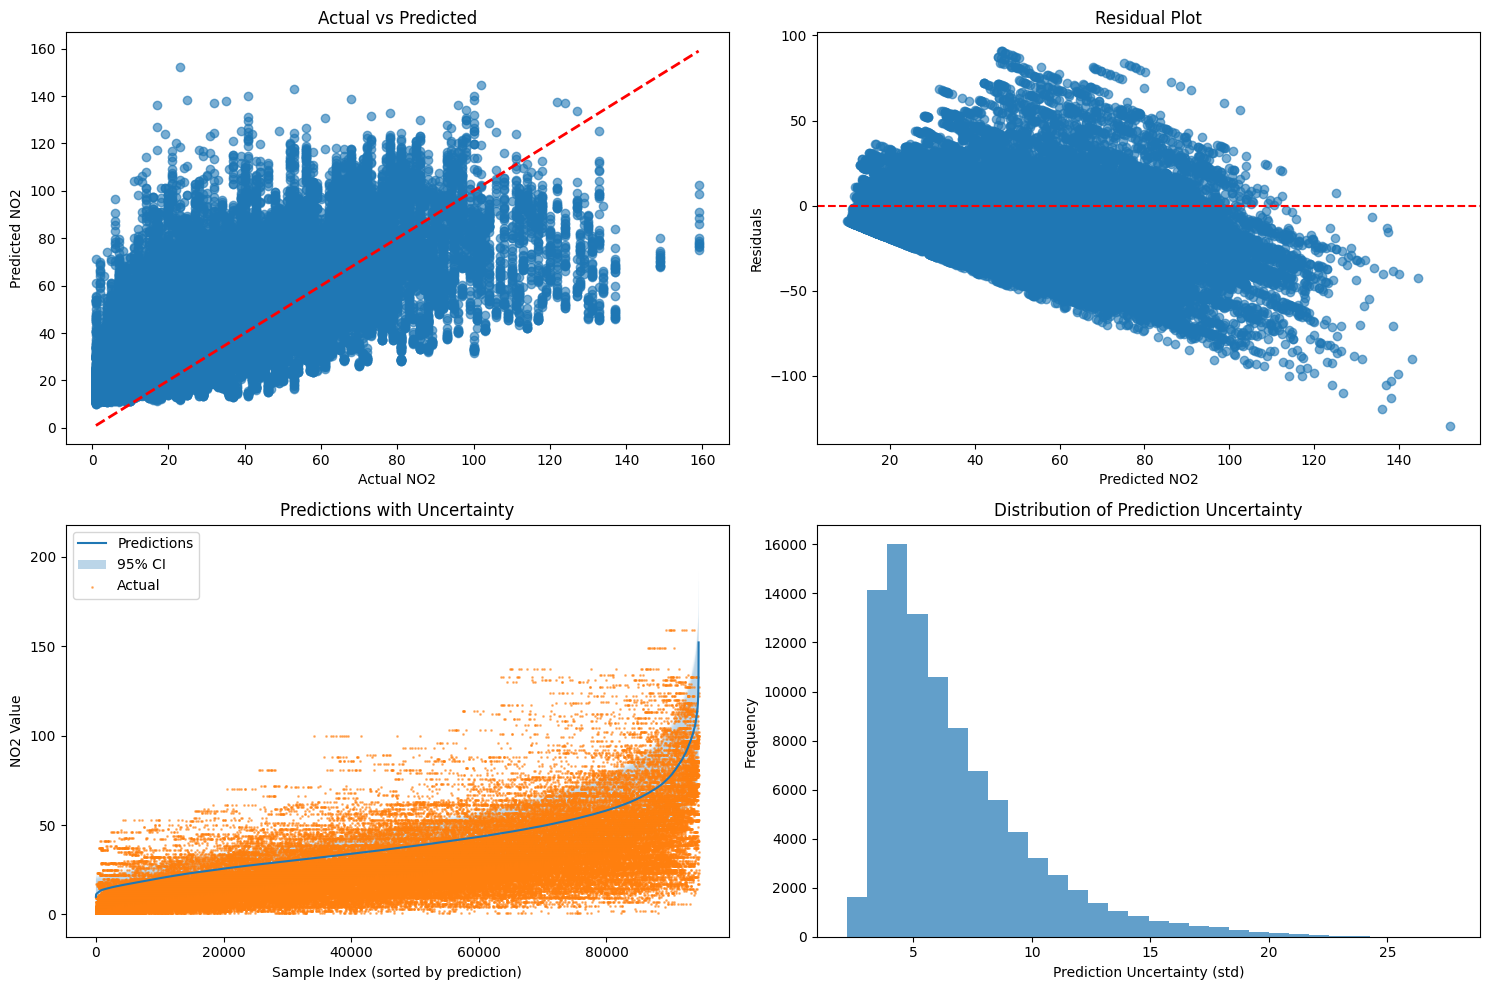

In [16]:
# To run the pipeline:
pipeline, results = run_pipeline(df)

Adding 2024 analysis to existing pipeline...
Train set: 320268 samples (2018-2022)
Val set: 108173 samples (2023-2023)
Test set: 94436 samples (2024-2024)
Found 94436 test data points for 2024 analysis

RUNNING 2024 TEMPORAL ANALYSIS
Analyzing 2024 performance...
Found 94436 data points for 2024
Date range: 2024-01-01 00:00:00 to 2024-12-01 00:00:00

2024 PERFORMANCE SUMMARY
Station: 28079056
Total data points: 94436
Date range: 2024-01-01 to 2024-12-01

Overall Metrics:
  Mean RMSE: 19.852 μg/m³
  Mean Uncertainty: 6.693 μg/m³
  Mean Absolute Error: 15.888 μg/m³

Temporal Aggregation Summary:
  Daily: 330 days, RMSE range: 6.47 - 45.35
  Weekly: 48 weeks, RMSE range: 11.28 - 32.29
  Monthly: 12 months, RMSE range: 9.28 - 27.39

Saved analysis figure as: NO2_BNN_2024_Analysis_28079056.png


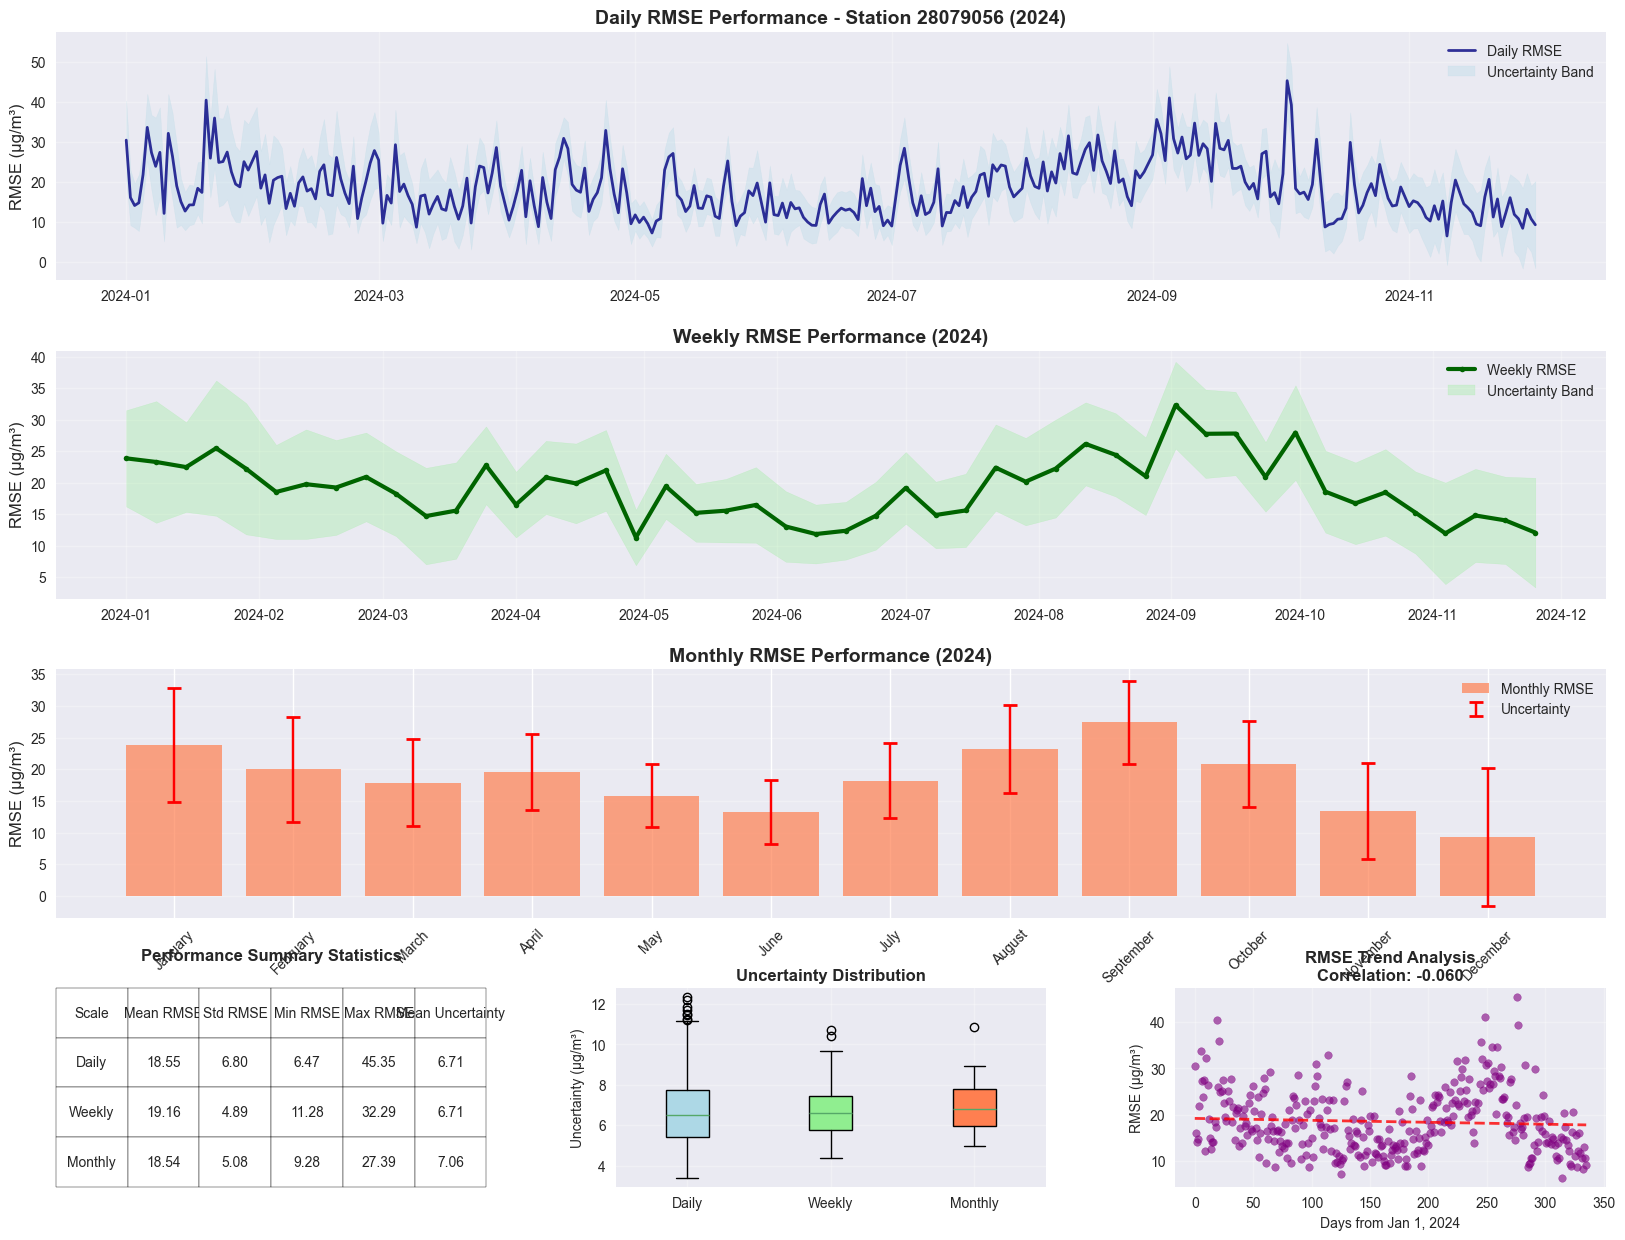


Quick insights:
Best performing month: 2024-12
Worst performing month: 2024-09
Average daily RMSE: 18.548 μg/m³
Average uncertainty: 6.715 μg/m³


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def analyze_2024_performance(pipeline, X_test, y_test, dates_test):
    """
    Analyze model performance for 2024 data with temporal aggregations
    """
    print("Analyzing 2024 performance...")
    
    # Get predictions with uncertainty
    pred_mean, pred_std = pipeline.predict_with_uncertainty(X_test, n_samples=100)
    
    # Calculate residuals and metrics
    residuals = y_test - pred_mean
    squared_errors = residuals ** 2
    
    # Create DataFrame with all relevant information
    results_df = pd.DataFrame({
        'date': pd.to_datetime(dates_test),
        'actual': y_test,
        'predicted': pred_mean,
        'uncertainty': pred_std,
        'residual': residuals,
        'squared_error': squared_errors,
        'absolute_error': np.abs(residuals)
    })
    
    # Filter for 2024 data only
    results_df = results_df[results_df['date'].dt.year == 2024].copy()
    
    if len(results_df) == 0:
        print("No 2024 data found in test set!")
        return None
    
    print(f"Found {len(results_df)} data points for 2024")
    print(f"Date range: {results_df['date'].min()} to {results_df['date'].max()}")
    
    # Add temporal grouping columns
    results_df['year_month'] = results_df['date'].dt.to_period('M')
    results_df['year_week'] = results_df['date'].dt.to_period('W')
    results_df['year_day'] = results_df['date'].dt.date
    results_df['month'] = results_df['date'].dt.month
    results_df['week'] = results_df['date'].dt.isocalendar().week
    results_df['day_of_year'] = results_df['date'].dt.dayofyear
    
    return results_df

def calculate_temporal_metrics(results_df):
    """
    Calculate RMSE and uncertainty metrics for different temporal aggregations
    """
    
    # Daily aggregation
    daily_metrics = results_df.groupby('year_day').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': 'count',
        'absolute_error': 'mean'
    }).reset_index()
    daily_metrics['rmse'] = np.sqrt(daily_metrics['squared_error'])
    daily_metrics['date'] = pd.to_datetime(daily_metrics['year_day'])
    daily_metrics['temporal_scale'] = 'Daily'
    
    # Weekly aggregation
    weekly_metrics = results_df.groupby('year_week').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': 'count',
        'absolute_error': 'mean'
    }).reset_index()
    weekly_metrics['rmse'] = np.sqrt(weekly_metrics['squared_error'])
    weekly_metrics['date'] = weekly_metrics['year_week'].dt.start_time
    weekly_metrics['temporal_scale'] = 'Weekly'
    
    # Monthly aggregation
    monthly_metrics = results_df.groupby('year_month').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': 'count',
        'absolute_error': 'mean'
    }).reset_index()
    monthly_metrics['rmse'] = np.sqrt(monthly_metrics['squared_error'])
    monthly_metrics['date'] = monthly_metrics['year_month'].dt.start_time
    monthly_metrics['temporal_scale'] = 'Monthly'
    
    return daily_metrics, weekly_metrics, monthly_metrics

def create_performance_visualization(daily_metrics, weekly_metrics, monthly_metrics, station_id):
    """
    Create comprehensive visualization of 2024 performance
    """
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))
    
    # Create a complex subplot layout
    gs = fig.add_gridspec(4, 3, height_ratios=[1, 1, 1, 0.8], hspace=0.3, wspace=0.3)
    
    # 1. Daily RMSE with uncertainty bands
    ax1 = fig.add_subplot(gs[0, :])
    
    # Plot daily RMSE
    ax1.plot(daily_metrics['date'], daily_metrics['rmse'], 
             color='navy', linewidth=2, label='Daily RMSE', alpha=0.8)
    
    # Add uncertainty bands (mean ± std of daily uncertainty)
    uncertainty_upper = daily_metrics['rmse'] + daily_metrics['uncertainty']
    uncertainty_lower = daily_metrics['rmse'] - daily_metrics['uncertainty']
    
    ax1.fill_between(daily_metrics['date'], uncertainty_lower, uncertainty_upper,
                     alpha=0.3, color='lightblue', label='Uncertainty Band')
    
    ax1.set_title(f'Daily RMSE Performance - Station {station_id} (2024)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Weekly RMSE with uncertainty
    ax2 = fig.add_subplot(gs[1, :])
    
    ax2.plot(weekly_metrics['date'], weekly_metrics['rmse'], 
             color='darkgreen', linewidth=3, marker='o', markersize=4, label='Weekly RMSE')
    
    # Add uncertainty bands for weekly
    weekly_upper = weekly_metrics['rmse'] + weekly_metrics['uncertainty']
    weekly_lower = weekly_metrics['rmse'] - weekly_metrics['uncertainty']
    
    ax2.fill_between(weekly_metrics['date'], weekly_lower, weekly_upper,
                     alpha=0.3, color='lightgreen', label='Uncertainty Band')
    
    ax2.set_title('Weekly RMSE Performance (2024)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Monthly RMSE with uncertainty
    ax3 = fig.add_subplot(gs[2, :])
    
    # Create month labels
    month_labels = monthly_metrics['date'].dt.strftime('%B')
    
    bars = ax3.bar(range(len(monthly_metrics)), monthly_metrics['rmse'], 
                   color='coral', alpha=0.7, label='Monthly RMSE')
    
    # Add uncertainty error bars
    ax3.errorbar(range(len(monthly_metrics)), monthly_metrics['rmse'], 
                yerr=monthly_metrics['uncertainty'], fmt='none', 
                color='red', capsize=5, capthick=2, label='Uncertainty')
    
    ax3.set_title('Monthly RMSE Performance (2024)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax3.set_xlabel('Month', fontsize=12)
    ax3.set_xticks(range(len(monthly_metrics)))
    ax3.set_xticklabels(month_labels, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Summary statistics table
    ax4 = fig.add_subplot(gs[3, 0])
    ax4.axis('tight')
    ax4.axis('off')
    
    # Calculate summary statistics
    summary_stats = []
    for metrics, scale in [(daily_metrics, 'Daily'), (weekly_metrics, 'Weekly'), (monthly_metrics, 'Monthly')]:
        stats = {
            'Scale': scale,
            'Mean RMSE': f"{metrics['rmse'].mean():.2f}",
            'Std RMSE': f"{metrics['rmse'].std():.2f}",
            'Min RMSE': f"{metrics['rmse'].min():.2f}",
            'Max RMSE': f"{metrics['rmse'].max():.2f}",
            'Mean Uncertainty': f"{metrics['uncertainty'].mean():.2f}"
        }
        summary_stats.append(stats)
    
    summary_df = pd.DataFrame(summary_stats)
    table = ax4.table(cellText=summary_df.values, colLabels=summary_df.columns,
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax4.set_title('Performance Summary Statistics', fontsize=12, fontweight='bold', pad=20)
    
    # 5. Uncertainty distribution
    ax5 = fig.add_subplot(gs[3, 1])
    
    # Combine all uncertainties - fixed version
    daily_unc = daily_metrics['uncertainty'].copy()
    weekly_unc = weekly_metrics['uncertainty'].copy()
    monthly_unc = monthly_metrics['uncertainty'].copy()
    
    # Create box plot - fixed version
    scales = ['Daily', 'Weekly', 'Monthly']
    uncertainty_data = [daily_unc.values, weekly_unc.values, monthly_unc.values]
    
    box_plot = ax5.boxplot(uncertainty_data, labels=scales, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'coral']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax5.set_title('Uncertainty Distribution', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Uncertainty (μg/m³)', fontsize=10)
    ax5.grid(True, alpha=0.3)
    
    # 6. RMSE trend analysis
    ax6 = fig.add_subplot(gs[3, 2])
    
    # Calculate correlation between time and RMSE for daily data
    daily_metrics['days_from_start'] = (daily_metrics['date'] - daily_metrics['date'].min()).dt.days
    correlation = daily_metrics['days_from_start'].corr(daily_metrics['rmse'])
    
    ax6.scatter(daily_metrics['days_from_start'], daily_metrics['rmse'], 
                alpha=0.6, color='purple', s=30)
    
    # Add trend line
    z = np.polyfit(daily_metrics['days_from_start'], daily_metrics['rmse'], 1)
    p = np.poly1d(z)
    ax6.plot(daily_metrics['days_from_start'], p(daily_metrics['days_from_start']), 
             "r--", alpha=0.8, linewidth=2)
    
    ax6.set_title(f'RMSE Trend Analysis\nCorrelation: {correlation:.3f}', 
                  fontsize=12, fontweight='bold')
    ax6.set_xlabel('Days from Jan 1, 2024', fontsize=10)
    ax6.set_ylabel('RMSE (μg/m³)', fontsize=10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def run_2024_analysis(pipeline, X_test, y_test, dates_test):
    """
    Complete analysis workflow for 2024 data
    """
    # Analyze performance
    results_df = analyze_2024_performance(pipeline, X_test, y_test, dates_test)
    
    if results_df is None:
        return None
    
    # Calculate temporal metrics
    daily_metrics, weekly_metrics, monthly_metrics = calculate_temporal_metrics(results_df)
    
    # Print summary
    print(f"\n{'='*60}")
    print("2024 PERFORMANCE SUMMARY")
    print(f"{'='*60}")
    print(f"Station: {pipeline.station_id}")
    print(f"Total data points: {len(results_df)}")
    print(f"Date range: {results_df['date'].min().strftime('%Y-%m-%d')} to {results_df['date'].max().strftime('%Y-%m-%d')}")
    print(f"\nOverall Metrics:")
    print(f"  Mean RMSE: {np.sqrt(results_df['squared_error'].mean()):.3f} μg/m³")
    print(f"  Mean Uncertainty: {results_df['uncertainty'].mean():.3f} μg/m³")
    print(f"  Mean Absolute Error: {results_df['absolute_error'].mean():.3f} μg/m³")
    
    print(f"\nTemporal Aggregation Summary:")
    print(f"  Daily: {len(daily_metrics)} days, RMSE range: {daily_metrics['rmse'].min():.2f} - {daily_metrics['rmse'].max():.2f}")
    print(f"  Weekly: {len(weekly_metrics)} weeks, RMSE range: {weekly_metrics['rmse'].min():.2f} - {weekly_metrics['rmse'].max():.2f}")
    print(f"  Monthly: {len(monthly_metrics)} months, RMSE range: {monthly_metrics['rmse'].min():.2f} - {monthly_metrics['rmse'].max():.2f}")
    
    # Create visualization
    fig = create_performance_visualization(daily_metrics, weekly_metrics, monthly_metrics, pipeline.station_id)
    
    # Return results for further analysis
    return {
        'results_df': results_df,
        'daily_metrics': daily_metrics,
        'weekly_metrics': weekly_metrics,
        'monthly_metrics': monthly_metrics,
        'figure': fig
    }

# Since you've already run: pipeline, results = run_pipeline(df)
# Now run this to get your 2024 analysis:

def add_2024_analysis_to_existing_pipeline(pipeline):
    """Add 2024 analysis to an already trained pipeline"""
    print("Adding 2024 analysis to existing pipeline...")
    
    # Re-extract the data that was used in training
    processed_data = pipeline.processed_data
    X, y, dates = pipeline.prepare_features_target()
    
    # Split data (same as in original pipeline)
    X_train, X_val, X_test, y_train, y_val, y_test = pipeline.split_data(X, y, dates)
    
    # Extract test dates for 2024 analysis
    years = pd.to_datetime(dates).year
    test_mask = years >= 2024
    dates_test = dates[test_mask]
    
    print(f"Found {len(dates_test)} test data points for 2024 analysis")
    
    # Run 2024 analysis
    print("\n" + "="*60)
    print("RUNNING 2024 TEMPORAL ANALYSIS")
    print("="*60)
    
    analysis_results = run_2024_analysis(pipeline, X_test, y_test, dates_test)
    
    if analysis_results:
        # Save the figure
        analysis_results['figure'].savefig(f'NO2_BNN_2024_Analysis_{pipeline.station_id}.png', 
                                           dpi=300, bbox_inches='tight')
        print(f"\nSaved analysis figure as: NO2_BNN_2024_Analysis_{pipeline.station_id}.png")
        
        # Show the plot
        plt.show()
    
    return analysis_results

# Modified run_pipeline function to include 2024 analysis
def run_pipeline_with_2024_analysis(df):
    """Run the complete pipeline with 2024 analysis"""
    print("Starting NO2 Nowcasting Pipeline with 2024 Analysis...")
    
    # Initialize pipeline
    pipeline = NO2NowcastingPipeline(df)
    
    # Select station
    station_data = pipeline.select_station()
    
    # Create features
    processed_data = pipeline.create_features()
    print(f"After feature engineering: {processed_data.shape}")
    
    # Prepare features and target
    X, y, dates = pipeline.prepare_features_target()  # dates comes from here!
    print(f"Feature matrix shape: {X.shape}")
    print(f"Number of features: {len(pipeline.feature_names)}")
    
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = pipeline.split_data(X, y, dates)
    
    # Extract test dates for 2024 analysis
    years = pd.to_datetime(dates).year
    test_mask = years >= 2024
    dates_test = dates[test_mask]
    
    # Train model
    print("\nTraining BNN model...")
    history = pipeline.train_model(X_train, y_train, X_val, y_val, epochs=50)
    
    # Evaluate model
    results = pipeline.evaluate_model(X_test, y_test)
    
    # Plot standard results
    pipeline.plot_results(y_test, results['predictions'], results['uncertainty'])
    
    # Run 2024 analysis
    print("\n" + "="*60)
    print("RUNNING 2024 TEMPORAL ANALYSIS")
    print("="*60)
    
    analysis_results = run_2024_analysis(pipeline, X_test, y_test, dates_test)
    
    if analysis_results:
        # Save the figure
        analysis_results['figure'].savefig(f'NO2_BNN_2024_Analysis_{pipeline.station_id}.png', 
                                           dpi=300, bbox_inches='tight')
        print(f"\nSaved analysis figure as: NO2_BNN_2024_Analysis_{pipeline.station_id}.png")
    
    return pipeline, results, analysis_results

# SIMPLE USAGE - Since you already ran: pipeline, results = run_pipeline(df)
# Just run this single line:

analysis_2024 = add_2024_analysis_to_existing_pipeline(pipeline)

# That's it! This will:
# 1. Extract the dates from your existing pipeline
# 2. Get the 2024 test data
# 3. Create the comprehensive visualization
# 4. Save the figure as PNG
# 5. Show the interactive plot

# Optional: Access specific metrics if you want
if analysis_2024:
    daily_metrics = analysis_2024['daily_metrics']
    weekly_metrics = analysis_2024['weekly_metrics'] 
    monthly_metrics = analysis_2024['monthly_metrics']
    
    print(f"\nQuick insights:")
    print(f"Best performing month: {monthly_metrics.loc[monthly_metrics['rmse'].idxmin(), 'year_month']}")
    print(f"Worst performing month: {monthly_metrics.loc[monthly_metrics['rmse'].idxmax(), 'year_month']}")
    print(f"Average daily RMSE: {daily_metrics['rmse'].mean():.3f} μg/m³")
    print(f"Average uncertainty: {daily_metrics['uncertainty'].mean():.3f} μg/m³")

Adding 2024 analysis to existing pipeline...
Train set: 320268 samples (2018-2022)
Val set: 108173 samples (2023-2023)
Test set: 94436 samples (2024-2024)
Found 94436 test data points for 2024 analysis

RUNNING 2024 TEMPORAL ANALYSIS
Analyzing 2024 performance...
Found 94436 data points for 2024
Date range: 2024-01-01 00:00:00 to 2024-12-01 00:00:00

2024 PERFORMANCE SUMMARY
Station: 28079056
Total data points: 94436
Date range: 2024-01-01 to 2024-12-01

Overall Metrics:
  Mean RMSE: 19.854 μg/m³
  Mean Uncertainty: 6.692 μg/m³
  Mean Absolute Error: 15.890 μg/m³

Temporal Aggregation Summary:
  Daily: 330 days, RMSE range: 6.55 - 45.31
  Weekly: 48 weeks, RMSE range: 11.31 - 32.27
  Monthly: 12 months, RMSE range: 9.91 - 27.37

Saved analysis figure as: NO2_BNN_2024_Analysis_28079056.png


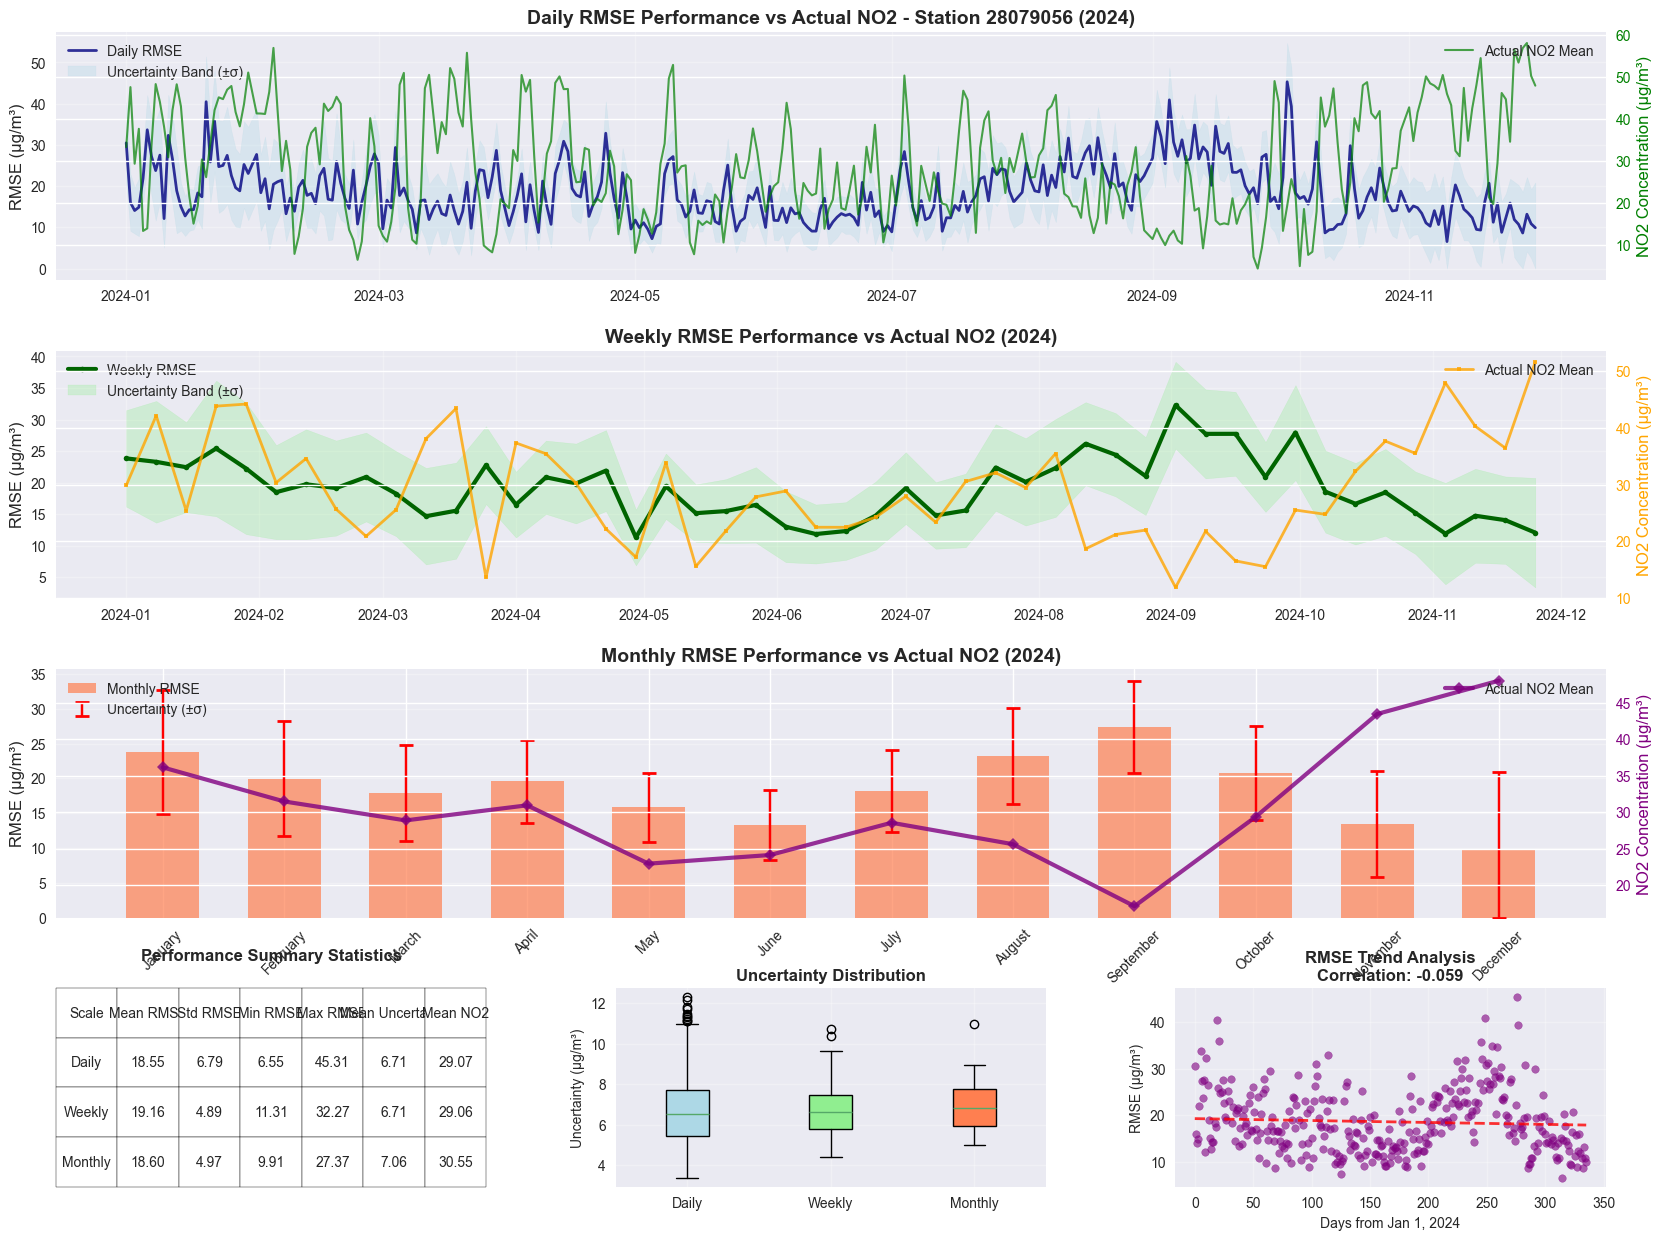


Quick insights:
Best performing month: 2024-12
Worst performing month: 2024-09
Average daily RMSE: 18.553 μg/m³
Average uncertainty: 6.715 μg/m³


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def analyze_2024_performance(pipeline, X_test, y_test, dates_test):
    """
    Analyze model performance for 2024 data with temporal aggregations
    """
    print("Analyzing 2024 performance...")
    
    # Get predictions with uncertainty
    pred_mean, pred_std = pipeline.predict_with_uncertainty(X_test, n_samples=100)
    
    # Calculate residuals and metrics
    residuals = y_test - pred_mean
    squared_errors = residuals ** 2
    
    # Create DataFrame with all relevant information
    results_df = pd.DataFrame({
        'date': pd.to_datetime(dates_test),
        'actual': y_test,
        'predicted': pred_mean,
        'uncertainty': pred_std,
        'residual': residuals,
        'squared_error': squared_errors,
        'absolute_error': np.abs(residuals)
    })
    
    # Filter for 2024 data only
    results_df = results_df[results_df['date'].dt.year == 2024].copy()
    
    if len(results_df) == 0:
        print("No 2024 data found in test set!")
        return None
    
    print(f"Found {len(results_df)} data points for 2024")
    print(f"Date range: {results_df['date'].min()} to {results_df['date'].max()}")
    
    # Add temporal grouping columns
    results_df['year_month'] = results_df['date'].dt.to_period('M')
    results_df['year_week'] = results_df['date'].dt.to_period('W')
    results_df['year_day'] = results_df['date'].dt.date
    results_df['month'] = results_df['date'].dt.month
    results_df['week'] = results_df['date'].dt.isocalendar().week
    results_df['day_of_year'] = results_df['date'].dt.dayofyear
    
    return results_df

def calculate_temporal_metrics(results_df):
    """
    Calculate RMSE and uncertainty metrics for different temporal aggregations
    """
    
    # Daily aggregation
    daily_metrics = results_df.groupby('year_day').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': ['count', 'mean'],  # Add mean of actual values
        'absolute_error': 'mean'
    }).reset_index()
    daily_metrics.columns = ['year_day', 'squared_error', 'uncertainty', 'count', 'actual_mean', 'absolute_error']
    daily_metrics['rmse'] = np.sqrt(daily_metrics['squared_error'])
    daily_metrics['date'] = pd.to_datetime(daily_metrics['year_day'])
    daily_metrics['temporal_scale'] = 'Daily'
    
    # Weekly aggregation
    weekly_metrics = results_df.groupby('year_week').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': ['count', 'mean'],  # Add mean of actual values
        'absolute_error': 'mean'
    }).reset_index()
    weekly_metrics.columns = ['year_week', 'squared_error', 'uncertainty', 'count', 'actual_mean', 'absolute_error']
    weekly_metrics['rmse'] = np.sqrt(weekly_metrics['squared_error'])
    weekly_metrics['date'] = weekly_metrics['year_week'].dt.start_time
    weekly_metrics['temporal_scale'] = 'Weekly'
    
    # Monthly aggregation
    monthly_metrics = results_df.groupby('year_month').agg({
        'squared_error': 'mean',
        'uncertainty': 'mean',
        'actual': ['count', 'mean'],  # Add mean of actual values
        'absolute_error': 'mean'
    }).reset_index()
    monthly_metrics.columns = ['year_month', 'squared_error', 'uncertainty', 'count', 'actual_mean', 'absolute_error']
    monthly_metrics['rmse'] = np.sqrt(monthly_metrics['squared_error'])
    monthly_metrics['date'] = monthly_metrics['year_month'].dt.start_time
    monthly_metrics['temporal_scale'] = 'Monthly'
    
    return daily_metrics, weekly_metrics, monthly_metrics

def create_performance_visualization(daily_metrics, weekly_metrics, monthly_metrics, station_id):
    """
    Create comprehensive visualization of 2024 performance
    """
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))
    
    # Create a complex subplot layout
    gs = fig.add_gridspec(4, 3, height_ratios=[1, 1, 1, 0.8], hspace=0.3, wspace=0.3)
    
    # 1. Daily RMSE with uncertainty bands and actual values
    ax1 = fig.add_subplot(gs[0, :])
    
    # Plot daily RMSE
    ax1.plot(daily_metrics['date'], daily_metrics['rmse'], 
             color='navy', linewidth=2, label='Daily RMSE', alpha=0.8)
    
    # Plot actual NO2 mean values
    ax1_twin = ax1.twinx()
    ax1_twin.plot(daily_metrics['date'], daily_metrics['actual_mean'], 
                  color='green', linewidth=1.5, alpha=0.7, label='Actual NO2 Mean')
    ax1_twin.set_ylabel('NO2 Concentration (μg/m³)', fontsize=12, color='green')
    ax1_twin.tick_params(axis='y', labelcolor='green')
    
    # Add uncertainty bands (RMSE ± uncertainty, ensuring no negative values)
    uncertainty_upper = daily_metrics['rmse'] + daily_metrics['uncertainty']
    uncertainty_lower = np.maximum(0, daily_metrics['rmse'] - daily_metrics['uncertainty'])  # Ensure no negative
    
    ax1.fill_between(daily_metrics['date'], uncertainty_lower, uncertainty_upper,
                     alpha=0.3, color='lightblue', label='Uncertainty Band (±σ)')
    
    ax1.set_title(f'Daily RMSE Performance vs Actual NO2 - Station {station_id} (2024)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    # 2. Weekly RMSE with uncertainty and actual values
    ax2 = fig.add_subplot(gs[1, :])
    
    ax2.plot(weekly_metrics['date'], weekly_metrics['rmse'], 
             color='darkgreen', linewidth=3, marker='o', markersize=4, label='Weekly RMSE')
    
    # Plot actual NO2 mean values for weekly
    ax2_twin = ax2.twinx()
    ax2_twin.plot(weekly_metrics['date'], weekly_metrics['actual_mean'], 
                  color='orange', linewidth=2, marker='s', markersize=3, alpha=0.8, label='Actual NO2 Mean')
    ax2_twin.set_ylabel('NO2 Concentration (μg/m³)', fontsize=12, color='orange')
    ax2_twin.tick_params(axis='y', labelcolor='orange')
    
    # Add uncertainty bands for weekly (ensuring no negative values)
    weekly_upper = weekly_metrics['rmse'] + weekly_metrics['uncertainty']
    weekly_lower = np.maximum(0, weekly_metrics['rmse'] - weekly_metrics['uncertainty'])  # Ensure no negative
    
    ax2.fill_between(weekly_metrics['date'], weekly_lower, weekly_upper,
                     alpha=0.3, color='lightgreen', label='Uncertainty Band (±σ)')
    
    ax2.set_title('Weekly RMSE Performance vs Actual NO2 (2024)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)
    
    # 3. Monthly RMSE with uncertainty and actual values
    ax3 = fig.add_subplot(gs[2, :])
    
    # Create month labels
    month_labels = monthly_metrics['date'].dt.strftime('%B')
    x_pos = range(len(monthly_metrics))
    
    # Plot RMSE bars
    bars = ax3.bar(x_pos, monthly_metrics['rmse'], 
                   color='coral', alpha=0.7, label='Monthly RMSE', width=0.6)
    
    # Add uncertainty error bars (ensuring no negative values)
    uncertainty_lower_bound = np.maximum(0, monthly_metrics['rmse'] - monthly_metrics['uncertainty'])
    uncertainty_upper_bound = monthly_metrics['rmse'] + monthly_metrics['uncertainty']
    
    # Calculate the actual error bar values (not negative)
    yerr_lower = monthly_metrics['rmse'] - uncertainty_lower_bound
    yerr_upper = uncertainty_upper_bound - monthly_metrics['rmse']
    
    ax3.errorbar(x_pos, monthly_metrics['rmse'], 
                yerr=[yerr_lower, yerr_upper], fmt='none', 
                color='red', capsize=5, capthick=2, label='Uncertainty (±σ)')
    
    # Plot actual NO2 mean values on secondary axis
    ax3_twin = ax3.twinx()
    ax3_twin.plot(x_pos, monthly_metrics['actual_mean'], 
                  color='purple', linewidth=3, marker='D', markersize=6, 
                  alpha=0.8, label='Actual NO2 Mean')
    ax3_twin.set_ylabel('NO2 Concentration (μg/m³)', fontsize=12, color='purple')
    ax3_twin.tick_params(axis='y', labelcolor='purple')
    
    ax3.set_title('Monthly RMSE Performance vs Actual NO2 (2024)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('RMSE (μg/m³)', fontsize=12)
    ax3.set_xlabel('Month', fontsize=12)
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(month_labels, rotation=45)
    ax3.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Summary statistics table
    ax4 = fig.add_subplot(gs[3, 0])
    ax4.axis('tight')
    ax4.axis('off')
    
    # Calculate summary statistics
    summary_stats = []
    for metrics, scale in [(daily_metrics, 'Daily'), (weekly_metrics, 'Weekly'), (monthly_metrics, 'Monthly')]:
        stats = {
            'Scale': scale,
            'Mean RMSE': f"{metrics['rmse'].mean():.2f}",
            'Std RMSE': f"{metrics['rmse'].std():.2f}",
            'Min RMSE': f"{metrics['rmse'].min():.2f}",
            'Max RMSE': f"{metrics['rmse'].max():.2f}",
            'Mean Uncertainty': f"{metrics['uncertainty'].mean():.2f}",
            'Mean NO2': f"{metrics['actual_mean'].mean():.2f}"
        }
        summary_stats.append(stats)
    
    summary_df = pd.DataFrame(summary_stats)
    table = ax4.table(cellText=summary_df.values, colLabels=summary_df.columns,
                      cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax4.set_title('Performance Summary Statistics', fontsize=12, fontweight='bold', pad=20)
    
    # 5. Uncertainty distribution
    ax5 = fig.add_subplot(gs[3, 1])
    
    # Combine all uncertainties - fixed version
    daily_unc = daily_metrics['uncertainty'].copy()
    weekly_unc = weekly_metrics['uncertainty'].copy()
    monthly_unc = monthly_metrics['uncertainty'].copy()
    
    # Create box plot - fixed version
    scales = ['Daily', 'Weekly', 'Monthly']
    uncertainty_data = [daily_unc.values, weekly_unc.values, monthly_unc.values]
    
    box_plot = ax5.boxplot(uncertainty_data, labels=scales, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'coral']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax5.set_title('Uncertainty Distribution', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Uncertainty (μg/m³)', fontsize=10)
    ax5.grid(True, alpha=0.3)
    
    # 6. RMSE trend analysis
    ax6 = fig.add_subplot(gs[3, 2])
    
    # Calculate correlation between time and RMSE for daily data
    daily_metrics['days_from_start'] = (daily_metrics['date'] - daily_metrics['date'].min()).dt.days
    correlation = daily_metrics['days_from_start'].corr(daily_metrics['rmse'])
    
    ax6.scatter(daily_metrics['days_from_start'], daily_metrics['rmse'], 
                alpha=0.6, color='purple', s=30)
    
    # Add trend line
    z = np.polyfit(daily_metrics['days_from_start'], daily_metrics['rmse'], 1)
    p = np.poly1d(z)
    ax6.plot(daily_metrics['days_from_start'], p(daily_metrics['days_from_start']), 
             "r--", alpha=0.8, linewidth=2)
    
    ax6.set_title(f'RMSE Trend Analysis\nCorrelation: {correlation:.3f}', 
                  fontsize=12, fontweight='bold')
    ax6.set_xlabel('Days from Jan 1, 2024', fontsize=10)
    ax6.set_ylabel('RMSE (μg/m³)', fontsize=10)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def run_2024_analysis(pipeline, X_test, y_test, dates_test):
    """
    Complete analysis workflow for 2024 data
    """
    # Analyze performance
    results_df = analyze_2024_performance(pipeline, X_test, y_test, dates_test)
    
    if results_df is None:
        return None
    
    # Calculate temporal metrics
    daily_metrics, weekly_metrics, monthly_metrics = calculate_temporal_metrics(results_df)
    
    # Print summary
    print(f"\n{'='*60}")
    print("2024 PERFORMANCE SUMMARY")
    print(f"{'='*60}")
    print(f"Station: {pipeline.station_id}")
    print(f"Total data points: {len(results_df)}")
    print(f"Date range: {results_df['date'].min().strftime('%Y-%m-%d')} to {results_df['date'].max().strftime('%Y-%m-%d')}")
    print(f"\nOverall Metrics:")
    print(f"  Mean RMSE: {np.sqrt(results_df['squared_error'].mean()):.3f} μg/m³")
    print(f"  Mean Uncertainty: {results_df['uncertainty'].mean():.3f} μg/m³")
    print(f"  Mean Absolute Error: {results_df['absolute_error'].mean():.3f} μg/m³")
    
    print(f"\nTemporal Aggregation Summary:")
    print(f"  Daily: {len(daily_metrics)} days, RMSE range: {daily_metrics['rmse'].min():.2f} - {daily_metrics['rmse'].max():.2f}")
    print(f"  Weekly: {len(weekly_metrics)} weeks, RMSE range: {weekly_metrics['rmse'].min():.2f} - {weekly_metrics['rmse'].max():.2f}")
    print(f"  Monthly: {len(monthly_metrics)} months, RMSE range: {monthly_metrics['rmse'].min():.2f} - {monthly_metrics['rmse'].max():.2f}")
    
    # Create visualization
    fig = create_performance_visualization(daily_metrics, weekly_metrics, monthly_metrics, pipeline.station_id)
    
    # Return results for further analysis
    return {
        'results_df': results_df,
        'daily_metrics': daily_metrics,
        'weekly_metrics': weekly_metrics,
        'monthly_metrics': monthly_metrics,
        'figure': fig
    }

# Since you've already run: pipeline, results = run_pipeline(df)
# Now run this to get your 2024 analysis:

def add_2024_analysis_to_existing_pipeline(pipeline):
    """Add 2024 analysis to an already trained pipeline"""
    print("Adding 2024 analysis to existing pipeline...")
    
    # Re-extract the data that was used in training
    processed_data = pipeline.processed_data
    X, y, dates = pipeline.prepare_features_target()
    
    # Split data (same as in original pipeline)
    X_train, X_val, X_test, y_train, y_val, y_test = pipeline.split_data(X, y, dates)
    
    # Extract test dates for 2024 analysis
    years = pd.to_datetime(dates).year
    test_mask = years >= 2024
    dates_test = dates[test_mask]
    
    print(f"Found {len(dates_test)} test data points for 2024 analysis")
    
    # Run 2024 analysis
    print("\n" + "="*60)
    print("RUNNING 2024 TEMPORAL ANALYSIS")
    print("="*60)
    
    analysis_results = run_2024_analysis(pipeline, X_test, y_test, dates_test)
    
    if analysis_results:
        # Save the figure
        analysis_results['figure'].savefig(f'NO2_BNN_2024_Analysis_{pipeline.station_id}.png', 
                                           dpi=300, bbox_inches='tight')
        print(f"\nSaved analysis figure as: NO2_BNN_2024_Analysis_{pipeline.station_id}.png")
        
        # Show the plot
        plt.show()
    
    return analysis_results

# Modified run_pipeline function to include 2024 analysis
def run_pipeline_with_2024_analysis(df):
    """Run the complete pipeline with 2024 analysis"""
    print("Starting NO2 Nowcasting Pipeline with 2024 Analysis...")
    
    # Initialize pipeline
    pipeline = NO2NowcastingPipeline(df)
    
    # Select station
    station_data = pipeline.select_station()
    
    # Create features
    processed_data = pipeline.create_features()
    print(f"After feature engineering: {processed_data.shape}")
    
    # Prepare features and target
    X, y, dates = pipeline.prepare_features_target()  # dates comes from here!
    print(f"Feature matrix shape: {X.shape}")
    print(f"Number of features: {len(pipeline.feature_names)}")
    
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = pipeline.split_data(X, y, dates)
    
    # Extract test dates for 2024 analysis
    years = pd.to_datetime(dates).year
    test_mask = years >= 2024
    dates_test = dates[test_mask]
    
    # Train model
    print("\nTraining BNN model...")
    history = pipeline.train_model(X_train, y_train, X_val, y_val, epochs=50)
    
    # Evaluate model
    results = pipeline.evaluate_model(X_test, y_test)
    
    # Plot standard results
    pipeline.plot_results(y_test, results['predictions'], results['uncertainty'])
    
    # Run 2024 analysis
    print("\n" + "="*60)
    print("RUNNING 2024 TEMPORAL ANALYSIS")
    print("="*60)
    
    analysis_results = run_2024_analysis(pipeline, X_test, y_test, dates_test)
    
    if analysis_results:
        # Save the figure
        analysis_results['figure'].savefig(f'NO2_BNN_2024_Analysis_{pipeline.station_id}.png', 
                                           dpi=300, bbox_inches='tight')
        print(f"\nSaved analysis figure as: NO2_BNN_2024_Analysis_{pipeline.station_id}.png")
    
    return pipeline, results, analysis_results

# SIMPLE USAGE - Since you already ran: pipeline, results = run_pipeline(df)
# Just run this single line:

analysis_2024 = add_2024_analysis_to_existing_pipeline(pipeline)

# That's it! This will:
# 1. Extract the dates from your existing pipeline
# 2. Get the 2024 test data
# 3. Create the comprehensive visualization
# 4. Save the figure as PNG
# 5. Show the interactive plot

# Optional: Access specific metrics if you want
if analysis_2024:
    daily_metrics = analysis_2024['daily_metrics']
    weekly_metrics = analysis_2024['weekly_metrics'] 
    monthly_metrics = analysis_2024['monthly_metrics']
    
    print(f"\nQuick insights:")
    print(f"Best performing month: {monthly_metrics.loc[monthly_metrics['rmse'].idxmin(), 'year_month']}")
    print(f"Worst performing month: {monthly_metrics.loc[monthly_metrics['rmse'].idxmax(), 'year_month']}")
    print(f"Average daily RMSE: {daily_metrics['rmse'].mean():.3f} μg/m³")
    print(f"Average uncertainty: {daily_metrics['uncertainty'].mean():.3f} μg/m³")